## 第三週作業 03/04: Cross Entropy vs KL Divergence
📌 臺灣師範大學 | 613K0019C | AI所碩一 | 劉思廷

In [15]:
""" 啟用內嵌繪圖模式，讓 matplotlib 圖表直接顯示在輸出區塊 """
%matplotlib inline

""" 固定四行引用套件 """
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
""" 定義 Cross Entropy 和 KL Divergence 函數 """
 # 參數: "P", "Q" 分別為 "真實" 以及 "生成" 的數據
 # 返回值: CE_value or KL_value (浮點數)
def cross_entropy(P, Q):
    return -sum(p * np.log(q) for p, q in zip(P, Q))

def kl_divergence(P, Q):
    return sum(p * np.log(p/q) for p, q in zip(P, Q))

In [17]:
""" 定義函數: generate_normalized_list """
 # 功能: 生成一個長度與 "P" 相同的隨機數列表，並將其正規化使總和為 1
 # 參數: "length" 為欲生成的隨機數個數
 # 返回值: "normalized_list": 正規化後的隨機數列表，元素總和為 1
def generate_normalized_list(length):
  random_numbers = np.random.rand(length) # 生成長度與 "P" 相同的隨機數（範圍在0-1之間）
  normalized_list = random_numbers / np.sum(random_numbers) # 正規化
  return normalized_list

In [18]:
""" 定義 Demo 數據 """
 # 建立固定數據 P ，並生成 N 個相同長度的數據
N = 10
P = [0.1, 0.2, 0.3, 0.4] # 固定數據
Q_list = [generate_normalized_list(len(P)) for _ in range(N)] # 10 個隨機生成數據
print("P:", P)
for i in range(N):
  print(f"Q{i+1}: {Q_list[i]}") # 印出生成的隨機數列表

P: [0.1, 0.2, 0.3, 0.4]
Q1: [0.5101243  0.146313   0.31238896 0.03117374]
Q2: [0.33838008 0.16273734 0.07120858 0.42767399]
Q3: [0.32688522 0.23702942 0.10110463 0.33498072]
Q4: [0.02412828 0.398413   0.08324485 0.49421387]
Q5: [0.08890244 0.0710507  0.36040805 0.4796388 ]
Q6: [0.43421764 0.19248258 0.3207874  0.05251238]
Q7: [0.42255273 0.02616347 0.30103667 0.25024713]
Q8: [0.1938184  0.01329389 0.40811308 0.38477463]
Q9: [0.0190635  0.09744091 0.52188875 0.36160684]
Q10: [0.31807745 0.15836441 0.3358525  0.18770564]


In [19]:
""" 計算結果 """
ce_values = [cross_entropy(P, Q) for Q in Q_list]
kl_values = [kl_divergence(P, Q) for Q in Q_list]

""" 輸出結果 """
for i, (ce, kl) in enumerate(zip(ce_values, kl_values)):
    print(f"Q{i+1}: Cross Entropy = {ce:.4f}, KL Divergence = {kl:.4f}")

Q1: Cross Entropy = 2.1880, KL Divergence = 0.9082
Q2: Cross Entropy = 1.6039, KL Divergence = 0.3240
Q3: Cross Entropy = 1.5247, KL Divergence = 0.2448
Q4: Cross Entropy = 1.5842, KL Divergence = 0.3043
Q5: Cross Entropy = 1.3709, KL Divergence = 0.0911
Q6: Cross Entropy = 1.9327, KL Divergence = 0.6529
Q7: Cross Entropy = 1.7291, KL Divergence = 0.4492
Q8: Cross Entropy = 1.6791, KL Divergence = 0.3992
Q9: Cross Entropy = 1.4637, KL Divergence = 0.1838
Q10: Cross Entropy = 1.4796, KL Divergence = 0.1997


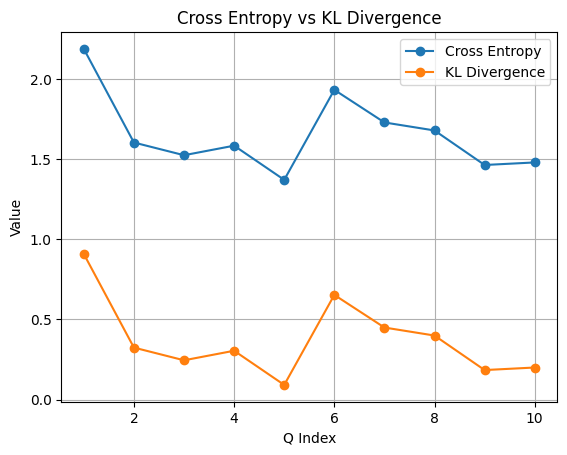

In [20]:
""" 視覺化結果 """
plt.plot(range(1, N+1), ce_values, label="Cross Entropy", marker='o')
plt.plot(range(1, N+1), kl_values, label="KL Divergence", marker='o')
plt.xlabel("Q Index")
plt.ylabel("Value")
plt.title("Cross Entropy vs KL Divergence")
plt.legend()
plt.grid(True)